In [ ]:
! youtube-dl  https://www.youtube.com/watch?v=fAxHlLK3Oyk -f 251 --output i-am-sitting-in-a-room.webm
! ffmpeg -i  i-am-sitting-in-a-room.webm -vn -acodec copy "i-am-sitting-in-a-room.ogg"
! ffmpeg -i  i-am-sitting-in-a-room.ogg i-am-sitting-in-a-room.wav
! ffmpeg -i i-am-sitting-in-a-room.wav -ar 4000 -ac 1 i-am-sitting-in-a-room.low.wav
! ffmpeg -i i-am-sitting-in-a-room.wav -ar 100 -ac 1 i-am-sitting-in-a-room.lowlow.wav
! ls -l i-am-sitting-in-a-room*

In [2]:
from scipy.io import wavfile
fs, data = wavfile.read('i-am-sitting-in-a-room.lowlow.wav')
fs, data

(100, array([0, 0, 0, ..., 0, 0, 0], dtype=int16))

In [4]:
from scipy.signal import find_peaks
import numpy
import scipy
import matplotlib.pyplot as plt

five_percent = int(len(data))
#corr = scipy.correlate(data, data, mode='full')
#corr = numpy.correlate(data[:five_percent].astype(float), data[:five_percent].astype(float), mode='full')

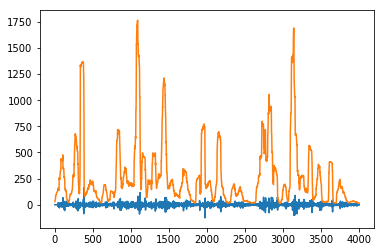

In [119]:
from scipy import signal
from scipy.signal import butter, lfilter, freqz

order = 6
fs = 100.0       # sample rate, Hz
cutoff =5  # desired cutoff frequency of the filter, Hz


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.convolve(a2, window, 'valid')

datarms = window_rms(data, 50)

b, a = butter_lowpass(cutoff, fs, order)

y = butter_lowpass_filter(datarms, cutoff, fs, order)

#plt.plot(datarms[:8100])
plt.plot(data[:4000])
plt.plot(datarms[:4000])


In [28]:
324000/40

8100.0

array([ 30.08,  31.06,  34.44, ..., 332.9 , 332.48, 343.82])

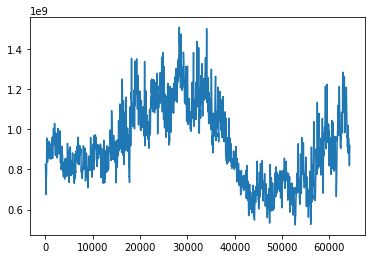

In [126]:
c = scipy.correlate(datarms[:8100], datarms[200000:], 'valid')

#p, d = find_peaks(c, height=120000)
plt.plot(c)
#plt.plot(p, c[p])
datarms[:8100]

0

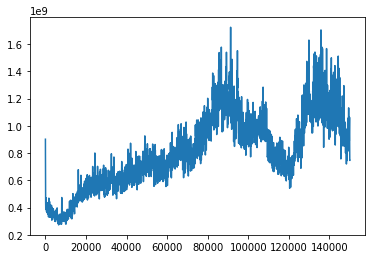

In [121]:
xx=[datarms[:8100].dot(datarms[v:v+8100]) for v in range(150000)]
plt.plot(xx)
sum(numpy.isnan(datarms))

In [84]:
len(data)

272462

In [ ]:

#b, a = signal.butter(4, 100, 'low', analog=True)
#plt.plot(data[40000:324000])

#plt.plot(data[0:1500])

#plt.plot(data[1500:324000])
#plt.plot(data[324000:324000*2+1800])
#plt.plot(data[324000*2+1800:325100*3])
#plt.plot(data[325100*3:325100*4-2300])
#plt.plot(data[325100*4-2300:325100*5-200])
#plt.plot(data[325100*5-200:325100*6+4800])
#plt.plot(data[325100*6+4800:325100*7+11400])
#plt.plot(data[325100*7+11400:325100*8+17600])

#cutoffs = [1500, 324000, 324000*2+1800, 325100*3, 325100*4-2300, 325100*5-200, 325100*6+4800, 325100*7+11400, 325100*8+17600]
#cutoffs
#min(numpy.diff(cutoffs))